*   분류 문제에 대한 **전반적인 이해도 향상**이 목적
*   MNIST dataset을 통해 **model output을 다듬으며 필요 지식들을 학습 / 복습**
*   tensorflow tutorial 예제를 중심으로 살을 붙여가면서 **코드를 점차적으로 고도화**

### **01. Import the packages**

In [1]:
## install tensorflow packages
# !pip install tensorflow-gpu==2.0.0-rc1

## import the libraries
import numpy as np # for matrix algebra
import tensorflow as tf # for deep learning framework
import matplotlib.pyplot as plt # for visualization
from tensorflow.keras import backend as K # to check the output

###**02. Load the dataset (MNIST)**

In [2]:
## load the dataset
mnist = tf.keras.datasets.mnist # carry the MNIST data package from tensorflow
(x_train, y_train), (x_test, y_test) = mnist.load_data() # load the dataset that has the matrix form

## convert the continuous value for the performance of NN
print('** original :\n\n',x_train[0][6]) # original value of the matrix (RGB)
x_train, x_test = x_train / 255.0, x_test / 255.0 # convert float type elements
print('\n\n** converted as "float" :\n\n',x_train[0][6]) # float type

## each data size
# We know that the image matrix size is 28X28, and the number of inputs are 60000 in train, 10000 in test.
print('\n\n matrix size : \n')
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

** original :

 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
 225 172 253 242 195  64   0   0   0   0]


** converted as "float" :

 [0.         0.         0.         0.         0.         0.
 0.         0.         0.11764706 0.14117647 0.36862745 0.60392157
 0.66666667 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686
 0.88235294 0.6745098  0.99215686 0.94901961 0.76470588 0.25098039
 0.         0.         0.         0.        ]


 matrix size : 

x_train:  (60000, 28, 28)
y_train:  (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


### **03. Check the 'real' digit images**

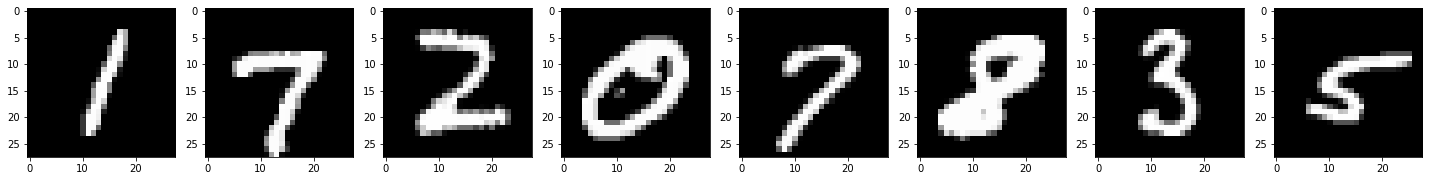

In [3]:
# see some images (28x28 size input)
plt.figure(figsize = (25,15))
for i in range(8):
  plt.subplot(int('18'+str(i+1)))
  plt.imshow(x_train[np.random.randint(10000),:,:],cmap = 'gray')
plt.show()

### **04. Model construction**

In [4]:
### REVIEW

## Flatten()
# Flattening a tensor means to remove all of the dimensions except for one.
# A Flatten layer in Keras reshapes the tensor to have a shape
# that is equal to the number of elements contained in the tensor.
# (example) original dim. = (None,4,4,512) >>> flattening = (None,8192 = 4*4*512)

## Dense()
# Fully Connected Neural Network.
# Structure: output = activation(dot(input, kernel) + bias), kernel == weights

## Dropout()
# The Dropout layer randomly sets input units to 0 with a frequency of rate at each step
# during training time, which helps prevent overfitting.

## softmax function
# The softmax transforms them into values between 0 and 1, so that they can be interpreted as probabilities.
# If one of the inputs is small or negative, the softmax turns it into a small probability,
# and if an input is large, then it turns it into a large probability, but it will always remain between 0 and 1.

## sparse_categorical_crossentropy
# for multi-classification problem (given integer label)

def myModel(end_act,opt,lossfn):
  ## model construction
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # image matrix size
    tf.keras.layers.Dense(128, activation = 'relu'), # expand the size to 128 units
    tf.keras.layers.Dropout(0.2), # consider the overfitting
    tf.keras.layers.Dense(10, activation = end_act) # output layer (correspond to 0~9)
  ])

  ## model compile (for model training)
  model.compile(optimizer = opt,loss = lossfn,metrics = ['accuracy'])
  return model

model = myModel('softmax','adam','sparse_categorical_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### **05. Model evaluation**

In [5]:
model.fit(x_train, y_train, epochs = 5) # model training
model.evaluate(x_test,  y_test, verbose = 2) # model evaluation

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4879 - accuracy: 0.8573
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1586 - accuracy: 0.9519
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1111 - accuracy: 0.9661
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0886 - accuracy: 0.9721
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0769 - accuracy: 0.9760
313/313 - 0s - loss: 0.0806 - accuracy: 0.9761


[0.08056194335222244, 0.9761000275611877]

### **06. Check the model output**

In [6]:
## create a Keras function to get i-th layer
get_layer_output = K.function(inputs = model.layers[0].input, outputs = model.layers[3].output) # choose the specific layer

## extract output
layer_output = get_layer_output(x_test)
print('** model output: \n\n',layer_output) # the collection of probability vectors
print('\n\n** output size check: \n\n',layer_output.shape) # 10000 is the observations (measurements), 10 is the dimension of the output vector

** model output: 

 [[4.8983434e-08 1.8254257e-09 4.3661607e-06 ... 9.9983180e-01
  3.7812879e-07 1.6826782e-05]
 [8.0833278e-09 6.0826994e-07 9.9999881e-01 ... 2.2375919e-14
  1.1999960e-08 9.9789361e-12]
 [7.4677018e-08 9.9909234e-01 2.4647039e-04 ... 4.0947253e-04
  2.2915733e-04 6.3661338e-07]
 ...
 [3.7179648e-11 2.5200050e-10 4.3004639e-10 ... 4.3008499e-06
  9.4647448e-06 9.5621166e-05]
 [3.8028880e-08 3.7018413e-09 7.2555401e-10 ... 4.7387953e-08
  2.1951278e-06 1.3462415e-11]
 [1.7692692e-08 6.8119838e-10 5.7240795e-06 ... 4.3372467e-12
  8.3463805e-09 1.5850485e-09]]


** output size check: 

 (10000, 10)


### **Trim the model output as 'digit' form**

In [7]:
## Find the index of the maximum value in the model output 
def get_digit(layer_output):
  pred = [] # list for containing 'digit'

  for i in range(len(layer_output)):
    max_val = 0 # the maximum of 10 probabilities
    ind = [] # the index of the maximum
    for j in range(len(layer_output[i])):

      if max_val < layer_output[i,j]: # criterion
        max_val = layer_output[i,j] # update
        ind.append(j) # save the index of each max_val

    pred.append(ind[-1]) # save the final max_val
  pred = np.array(pred) # convert the data type
  return pred

In [8]:
print('** label: \n',y_test)
print('\n** prediction: \n',get_digit(layer_output))

** label: 
 [7 2 1 ... 4 5 6]

** prediction: 
 [7 2 1 ... 4 5 6]
